https://mp.weixin.qq.com/s/kgVmAqrmhGwfPj-DSCVjmQ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [2]:
# 加载数据
def load_data(path,transpose=True):
    data = sio.loadmat(path)
    X = data.get('X')
    y = data.get('y')
    y = y.reshape(y.shape[0])
    if transpose:
        X = np.array([im.reshape((20,20)).T for im in X])
        X = np.array([im.reshape(400) for im in X])
    return X,y

In [3]:
X, y = load_data('../../dataset/ex3data1.mat')
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [4]:
# 绘图
def plot_an_image(image):
    fig,ax = plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape((20,20)),cmap=matplotlib.cm.binary)
    plt.xticks()
    plt.yticks()

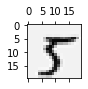

this shoule be 5


In [6]:
pick_one = np.random.randint(0,5000)
plot_an_image(X[pick_one,:])
plt.show()
print('this shoule be {}'.format(y[pick_one]))

In [7]:

def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))  
            #绘图函数，画100张图片

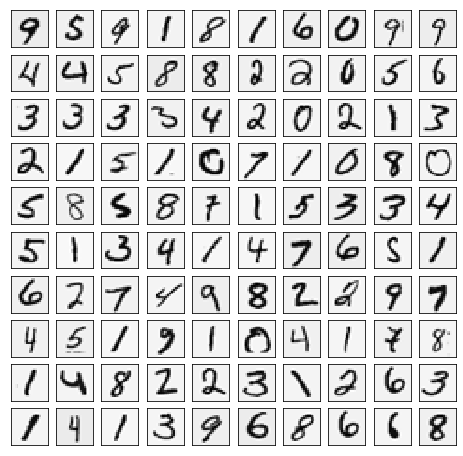

In [8]:
plot_100_image(X)
plt.show()

In [10]:
raw_X, raw_y = load_data('../../dataset/ex3data1.mat')

print(raw_X.shape)
print(raw_y.shape)

(5000, 400)
(5000,)


In [11]:
# 添加第一列全 1 向量
X = np.insert(raw_X, 0, values = np.ones(raw_X.shape[0]), axis = 1)
X.shape

(5000, 401)

In [12]:

# 把原标签中的每一类用一个行向量表示
y_matrix = []

# k = 1 ... 10
# 当 raw_y == k 时把对应位置的值设置为 1，否则为 0
for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))

# 因为 Matlab 下标从 1 开始，所以 raw_y 中用 10 表示标签 0
# 这里把标签 0 的行向量移动到第一行
y_matrix = [y_matrix[-1]] + y_matrix[:-1]

y = np.array(y_matrix)

# 10 行表示 0 - 9 这 10 个类别
y.shape

(10, 5000)

In [14]:
# 逻辑回归假设函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
# 逻辑回归代价函数
def cost(theta,X,y):
    return np.mean(-y*np.log(sigmoid(X @ theta)) - (1-y)*np.log(1-sigmoid(X @ theta)))

In [16]:
# 逻辑回归正则化代价函数
def regularized_cost(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    # 正则化代价
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()
    return cost(theta,X,y) + regularized_term

In [21]:
# 计算梯度
def gradient(theta,X,y):
    return (1/len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [22]:
# 正则化梯度
def regularized_gradient(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    
    # 正则化梯度
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # 不对 theta_0 正则化
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

In [23]:
# 逻辑回归训练函数
"""逻辑回归函数
    args:
        X: 特征矩阵, (m, n + 1)，第一列为全 1 向量
        y: 标签矩阵, (m, )
        l: 正则化系数

    return: 训练的参数向量
"""
def logistic_regression(X, y, l = 1):
    # 保存训练的参数向量，维度为特征矩阵的列数，即特征数 + 1
    theta = np.zeros(X.shape[1])

    # 使用正则化代价和梯度训练
    res = opt.minimize(fun = regularized_cost,
                       x0 = theta,
                       args = (X, y, l),
                       method = 'TNC',
                       jac = regularized_gradient,
                       options = {'disp': True})
    
    # 得到最终训练参数
    final_theta = res.x

    return final_theta

In [24]:
theta_0 = logistic_regression(X,y[0])

In [25]:
# 预测
def predict(x,theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [26]:
# 字符 0 的预测值，也是 5000 行 1 列
y_pred = predict(X, theta_0)

In [27]:
# 打印预测数字 1 的精度
print('Accuracy = {}'.format(np.mean(y[0] == y_pred)))

Accuracy = 0.9974

Accuracy = 0.9974
